# 1. Inicializar o Dataset

## 1.1. Importar as dependências

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1.2. Importar o DataFrame

In [95]:
df = pd.read_csv("docs/heart.csv")

## 1.3. Checar como os campos foram interpretados

In [96]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [97]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [98]:
df.shape

(918, 12)

## 1.4. Tabelas da seção 3.1 do relatório

### Tabela 2

In [99]:
numeric_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]

desc_numeric = df[numeric_cols].describe().T

desc_numeric

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


### Tabela 3

In [100]:
cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

freqs = {}
for col in cat_cols:
    vc = df[col].value_counts()
    rel = df[col].value_counts(normalize=True) * 100
    freqs[col] = pd.DataFrame({
        "categoria": vc.index,
        "frequencia": vc.values,
        "percentual": rel.values.round(2)
    })

In [101]:
freqs["Sex"]

,categoria,frequencia,percentual
0,M,725,78.98
1,F,193,21.02


In [102]:
freqs["ChestPainType"]

,categoria,frequencia,percentual
0,ASY,496,54.03
1,NAP,203,22.11
2,ATA,173,18.85
3,TA,46,5.01


In [103]:
freqs["RestingECG"]

,categoria,frequencia,percentual
0,Normal,552,60.13
1,LVH,188,20.48
2,ST,178,19.39


In [104]:
freqs["ExerciseAngina"]

,categoria,frequencia,percentual
0,N,547,59.59
1,Y,371,40.41


In [105]:
freqs["ST_Slope"]

,categoria,frequencia,percentual
0,Flat,460,50.11
1,Up,395,43.03
2,Down,63,6.86


### Tabela 4

In [106]:
target_counts = df["HeartDisease"].value_counts()
target_rel = df["HeartDisease"].value_counts(normalize=True) * 100

tabela4 = pd.DataFrame({
    "classe": target_counts.index,
    "frequencia": target_counts.values,
    "percentual": target_rel.values.round(2)
})

tabela4

,classe,frequencia,percentual
0,1,508,55.34
1,0,410,44.66


## 1.5. Gráficos da seção 3.2 do relatório

### Histogramas (Age, RestingBP, Cholesterol, MaxHR)

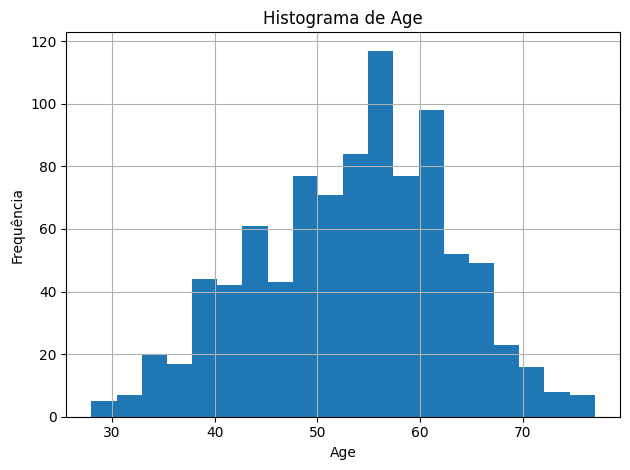

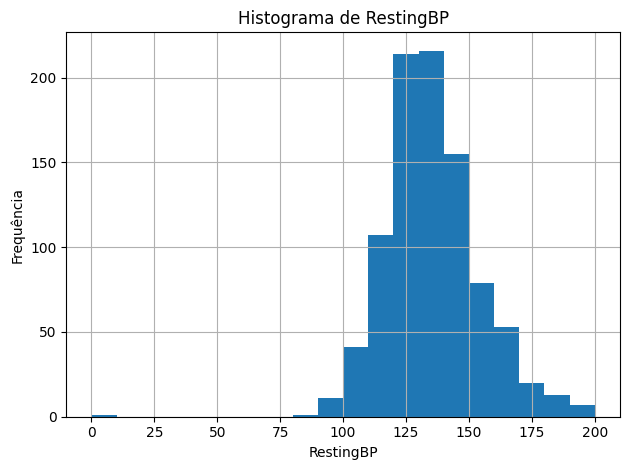

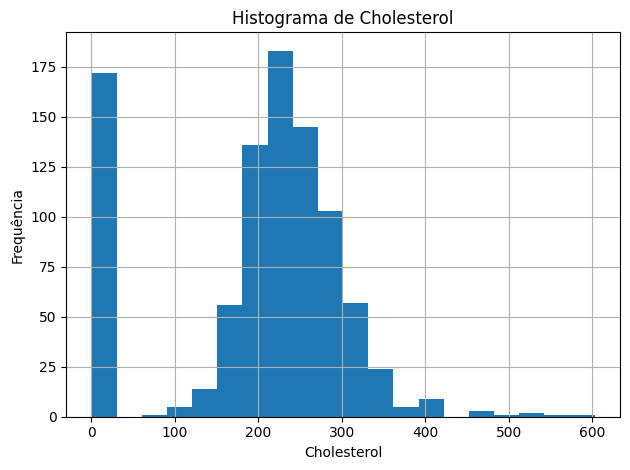

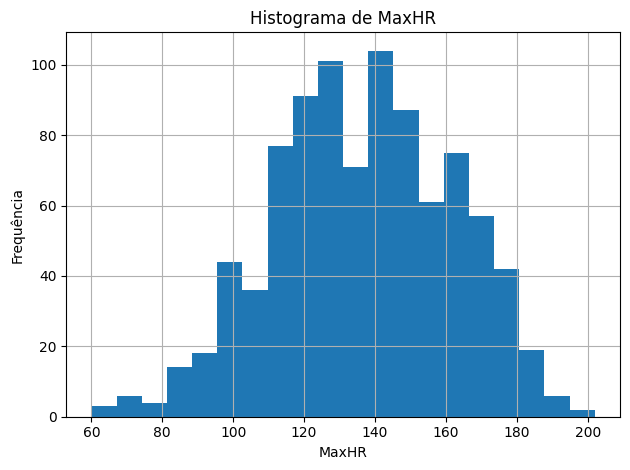

In [107]:
cols_hist = ["Age", "RestingBP", "Cholesterol", "MaxHR"]

for col in cols_hist:
    plt.figure()
    df[col].hist(bins=20)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()


### Gráficos para os categóricos

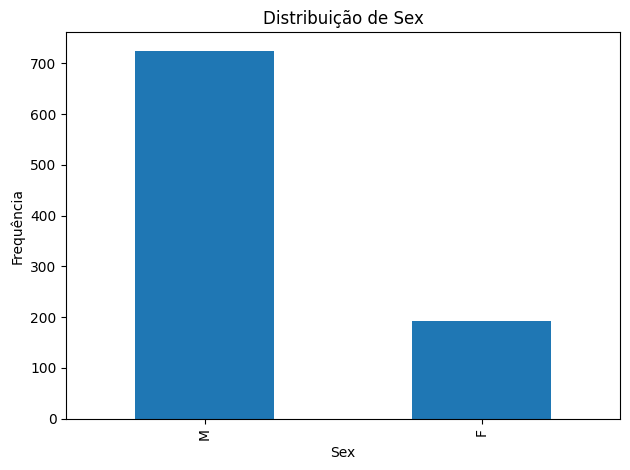

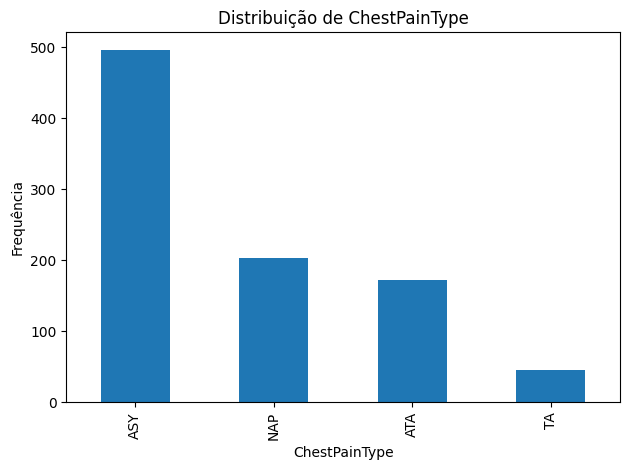

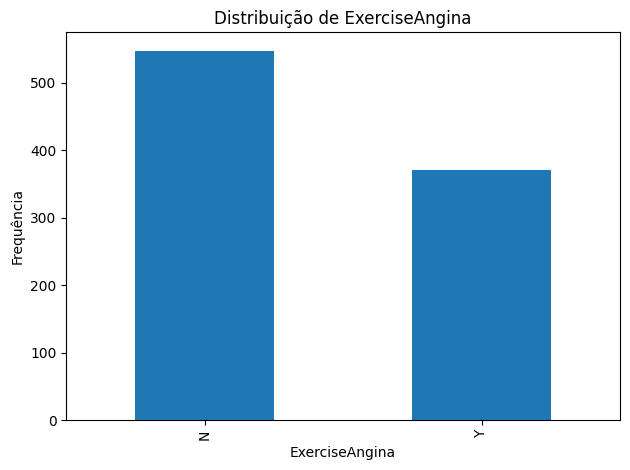

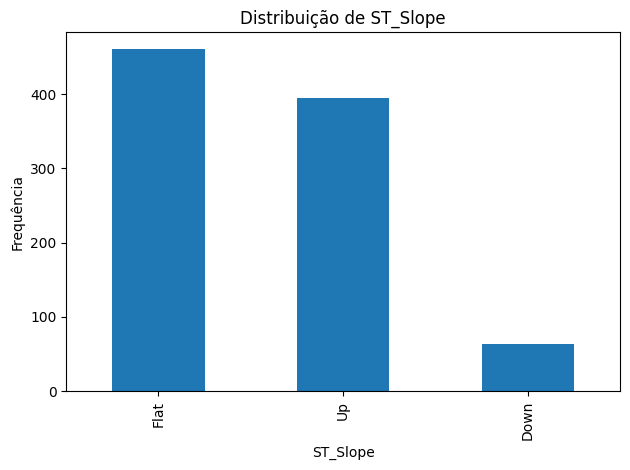

In [108]:
cols_bar = ["Sex", "ChestPainType", "ExerciseAngina", "ST_Slope"]

for col in cols_bar:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()


## 1.6. Gráfico de barras da variável alvo

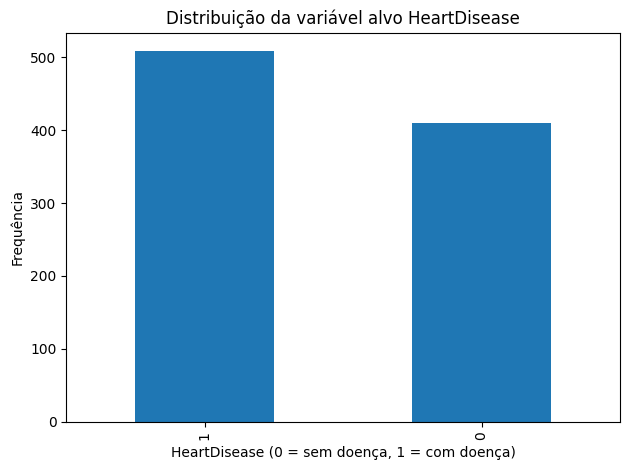

In [109]:
plt.figure()
df["HeartDisease"].value_counts().plot(kind="bar")
plt.title("Distribuição da variável alvo HeartDisease")
plt.xlabel("HeartDisease (0 = sem doença, 1 = com doença)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


## 1.7. Tabela da seção 3.3

In [110]:
missing = df.isna().sum().to_frame(name="faltantes")
missing["percentual"] = (missing["faltantes"] / len(df) * 100).round(2)
missing

,faltantes,percentual
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


# 2. Pré-processamento

## 2.1. Separar atributo alvo

In [111]:
target_col = "HeartDisease"

## 2.2. Codificar variáveis categóricas (one-hot encoding)

In [112]:
cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

## 2.3. Separar em treino e teste (70% / 30%), estratificando pela classe

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    shuffle=True,
    random_state=42,
)

## 2.4. Normalizar atributos numéricos para modelos sensíveis à escala

In [114]:
numeric_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])